Описание данных

Набор данных содержит транзакции, совершенные по кредитным картам в сентябре 2013 года европейскими держателями карт.
В этом наборе данных представлены транзакции, произошедшие за два дня, где у нас 492 мошенничества из 284 807 транзакций. Датасет сильно несбалансирован, на позитивный класс (мошенничество) приходится 0,172% всех транзакций.

Он содержит только числовые входные переменные, которые являются результатом преобразования PCA. К сожалению, из-за проблем с конфиденциальностью мы не можем предоставить исходные функции и дополнительную справочную информацию о данных. Особенности V1, V2, ... V28 являются основными компонентами, полученными с PCA, единственными характеристиками, которые не были преобразованы с PCA, являются «Время» и «Количество». Функция «Время» содержит секунды, прошедшие между каждой транзакцией и первой транзакцией в наборе данных. Функция 'Amount' - это сумма транзакции, эта функция может быть использована, например, для зависимого от затрат обучения. Признак 'Class' является переменной ответа и принимает значение 1 в случае мошенничества и 0 в противном случае.

Проведение разведочного анализа данных


In [1]:
# Для работы с файлами с гугл диска
from google.colab import drive
drive.mount('/content/drive')
# Библиотеки для работы с векторами и таблицыми данных
import pandas as pd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# чтение данных из csv файла
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Task_2/creditcard.csv')

# выведем первые 10 строк
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
print(f'Размер датафрейма: {df.shape[0]} строк, {df.shape[1]} столбцов.')

Размер датафрейма: 284807 строк, 31 столбцов.


In [4]:
# Импорт необходимых библиотек
import time
import numpy as np
# модуль для визуального представления оценки пропусков
import missingno as msno
# модули визуализации данных
import seaborn as sns
import matplotlib.pyplot as plt
# модуль для разделения выборки на тестовую и обучающую
from sklearn.model_selection import train_test_split

In [5]:
sns.set()

 Определение зависимости в данных

<Axes: >

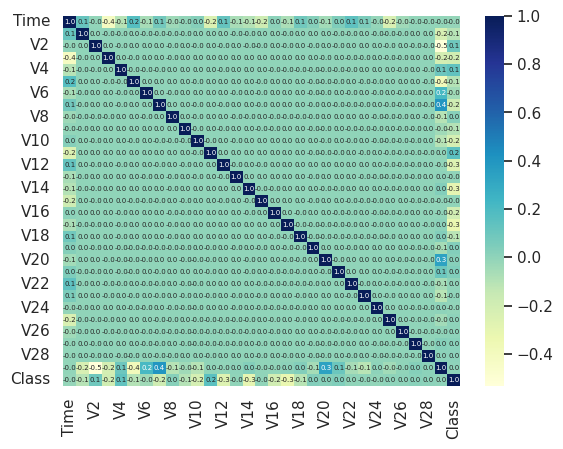

In [6]:
cm = df.corr() #  создание корреляционной матрицы в pandas
sns.heatmap(cm, annot=True, annot_kws={'size': 5},fmt='.1f',cmap='YlGnBu')

Вывод информации  о DataFrame: индекс dtype и столбцы, значения, отличные от NULL, и использование памяти.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<Axes: >

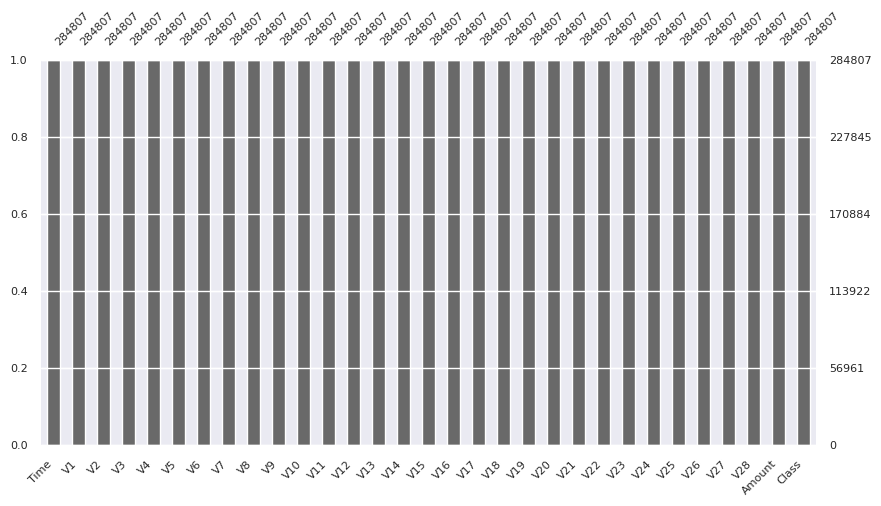

In [8]:
# проверка на наличие пропусков
msno.bar(df, figsize=(10, 5), fontsize=8)

In [9]:
# Проверка на наличие дубликатов и удаление
print(df.duplicated().sum())
df.drop_duplicates(inplace = True)

1081


In [10]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Описание статистики

In [11]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


Определение сбалансированности классов

Количественное соотношение классов:
Честные транзакции: 283253
Мошеннические транзакции: 473
Процентное соотношение классов:
Честные транзакции: 99.83%
Мошеннические транзакции: 0.17%


<Axes: xlabel='Class', ylabel='Count'>

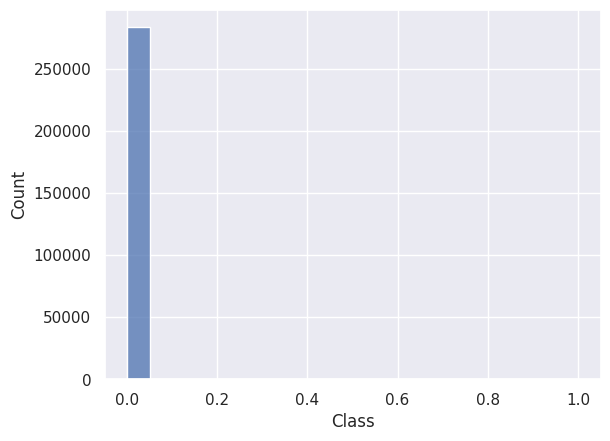

In [12]:
# Оценка процента мошенничества в датасете
df_0, df_1 = df['Class'].value_counts() # Проверка на сбалансированность
print('Количественное соотношение классов:')
print('Честные транзакции: {}'.format(df_0))
print('Мошеннические транзакции: {}'.format(df_1))

print('Процентное соотношение классов:')
print('Честные транзакции: {:.2f}%'.format((df_0 / (df_0 + df_1)) * 100))
print('Мошеннические транзакции: {:.2f}%'.format((df_1 / (df_0 + df_1)) * 100))

sns.histplot(df['Class'])

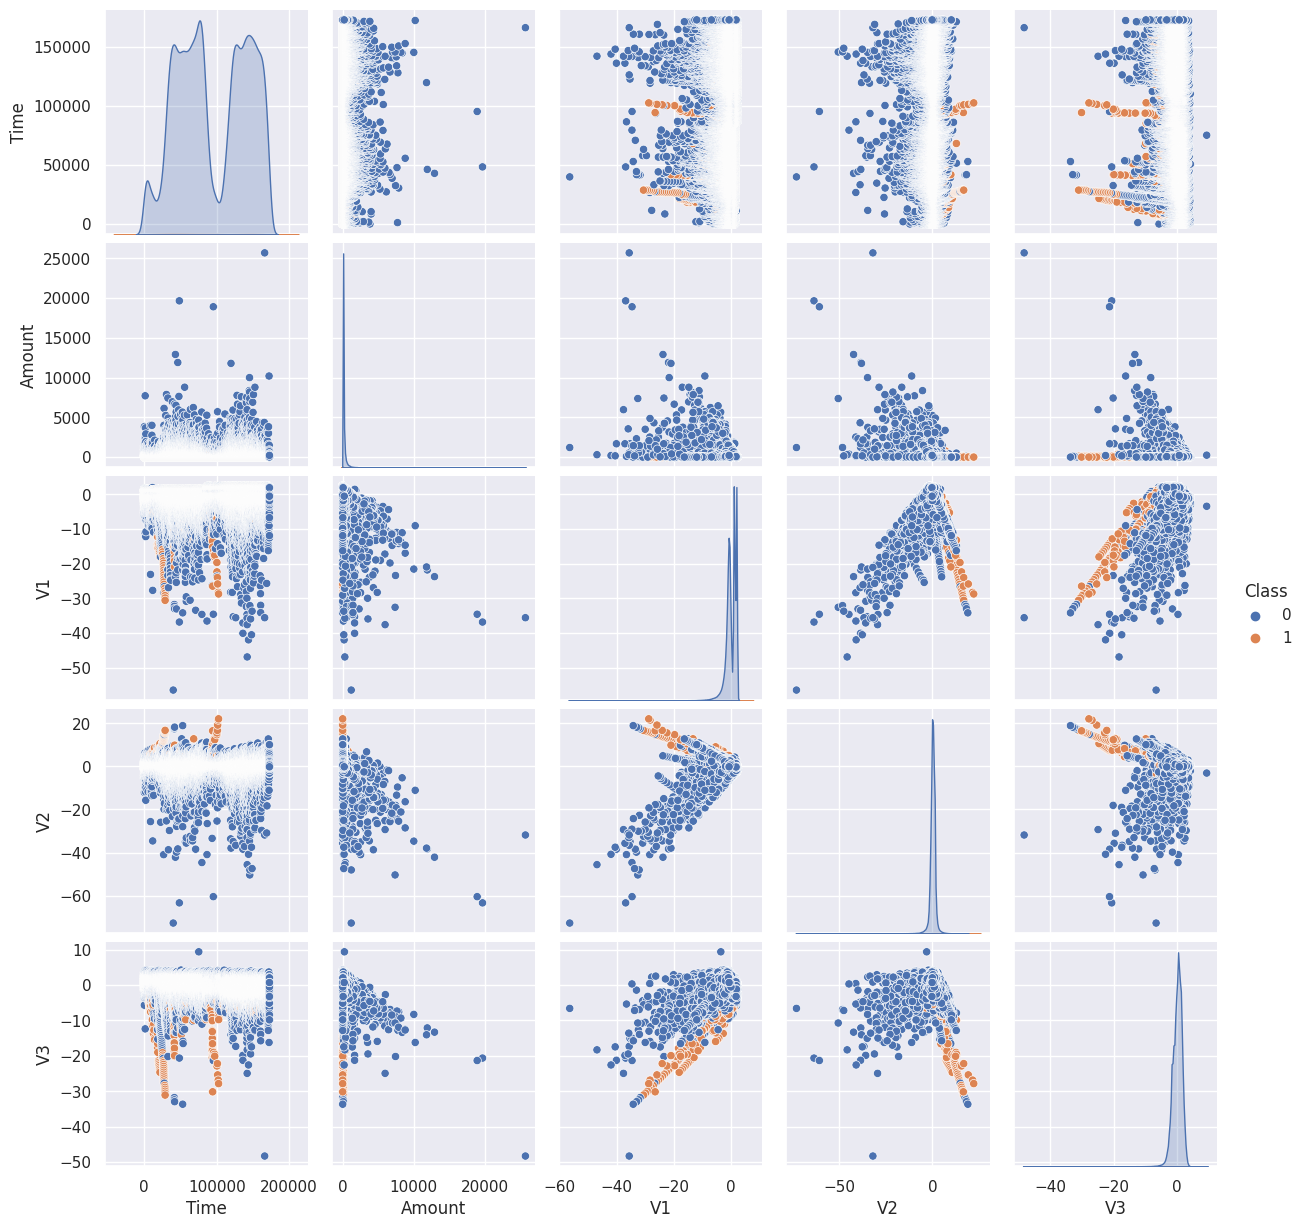

In [13]:
# Исследуем попарные зависимости части данных
# Задействуем для визуализации лишь часть признаков: V1, V2, V3 и непреобразованные данные Time и Amount
cols = ['Time', 'Amount', 'V1', 'V2', 'V3', 'Class']
sns_plot = sns.pairplot(df[cols], hue='Class')

Для многих случаев связь нелинейна, т.е лучше попробовать использовать нелинейный модели. Но во некоторых случая классы могут быть разделены.

In [14]:
# Разделение данных на train/test
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=42, stratify=y)

In [15]:
# Выведем информацию о мошеннических операциях вкаждой выборке
train = round(y_train.value_counts()[1] / y_train.shape[0] * 100, 2)
test = round(y_test.value_counts()[1] / y_test.shape[0] * 100, 2)
print(f'Процент мошеннических операций в обучающей выборке: {train}%')
print(f'Процент мошеннических операций в тестовой выборке: {test}%')

Процент мошеннических операций в обучающей выборке: 0.17%
Процент мошеннических операций в тестовой выборке: 0.17%


Сравним статистики тренировочной и тестовой выборки


In [16]:
X_train.describe() - X_test.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,-113492.000000,-113492.000000,-113492.000000,-113492.000000,-113492.000000,-113492.000000,-113492.000000,-113492.000000,-113492.000000,-113492.000000,...,-113492.000000,-113492.000000,-113492.000000,-113492.000000,-113492.000000,-113492.000000,-113492.000000,-113492.000000,-113492.000000,-113492.000000
mean,203.667155,0.001948,-0.001884,0.000464,0.008145,0.009836,0.000496,-0.004301,-0.000035,-0.001457,...,-0.002430,0.003895,0.001226,0.003222,0.001967,-0.000903,0.003695,-0.002244,0.003551,-1.455154
std,-2.593731,0.020411,0.021077,0.008359,0.012470,-0.010335,-0.004835,-0.016938,0.017465,0.000798,...,-0.017906,0.015043,0.001157,0.010766,-0.003208,-0.001514,-0.000339,-0.005021,0.026634,-7.757278
min,2.000000,-15.937368,-9.371029,15.360244,-0.082564,81.651178,-2.663792,2.050445,-22.528299,-0.113912,...,31.077548,-11.941035,1.433721,14.538015,0.021729,2.799656,-0.070221,13.174700,6.951398,0.000000
25%,82.000000,0.001956,0.007087,0.002563,-0.000707,0.008730,0.002066,0.006736,-0.000386,-0.002123,...,-0.000521,-0.001812,-0.000676,0.000802,0.005483,-0.000748,0.001375,0.000142,0.000233,-0.090000
50%,401.000000,0.003556,0.002542,-0.008896,0.012626,0.007611,-0.004203,-0.000316,0.000567,0.000382,...,-0.000815,0.000888,0.000000,0.000216,0.001991,-0.002066,0.004369,-0.000393,0.000203,-0.160000
75%,180.000000,0.001676,0.001229,-0.003489,0.006051,-0.006060,0.003078,-0.004414,0.002598,0.003397,...,-0.001410,0.001422,0.001761,0.000817,0.000522,-0.002172,0.002349,0.000130,0.000605,-1.410000
max,-4.000000,-0.003042,-0.590526,-5.194748,0.159807,0.702357,-51.908557,-86.286317,-0.419436,-5.268862,...,-1.303695,4.603296,2.186815,-1.725068,-0.568207,1.448738,-0.297167,-23.507901,17.718199,-6781.160000


In [17]:
y_train.describe()-y_test.describe()

count   -113492.000000
mean          0.000002
std           0.000021
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           0.000000
Name: Class, dtype: float64

Можно заметить, что статистики между обучающей и тестовой выборкой схожи.

In [18]:
# библиотека машинного обучения
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
# модуль для разделения выборки на тестовую и обучающую
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

In [19]:
# Стандатизируем данные
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

LogisticRegression


In [41]:
log_reg_model =LogisticRegression(class_weight='balanced', solver='lbfgs', max_iter=1000000)
log_reg_model.fit(X_train_ss, y_train)
y_pred_logreg = log_reg_model.predict(X_test_ss)

In [43]:
print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99    198278
           1       0.05      0.89      0.10       331

    accuracy                           0.97    198609
   macro avg       0.53      0.93      0.54    198609
weighted avg       1.00      0.97      0.98    198609



In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_logreg)

array([[192953,   5325],
       [    37,    294]])

**Выводы по первому методу:**

Presission:
Метрика для класса 1 дала значение всего 0.05. Таким образом, модель отобрала всего 5% значений класса 1

Recall:
Метрика имеет довольно большие значения для обоих классов.

Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
rand_forest = RandomForestClassifier(random_state=42, n_jobs=-1)

rand_forest.fit(X_train_ss, y_train)
y_pred_rf = rand_forest.predict(X_test_ss)

In [25]:
print(classification_report(y_test, y_pred_rf))
confusion_matrix(y_test,y_pred_rf)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    198278
           1       0.94      0.77      0.84       331

    accuracy                           1.00    198609
   macro avg       0.97      0.88      0.92    198609
weighted avg       1.00      1.00      1.00    198609



array([[198261,     17],
       [    77,    254]])

**Выводы по второму методу:**

Presission:
Метрика значительно увеличилась для класса 1 и теперь равняется 0.94.

Recall:
Метрика имеет довольно большие значения для обоих классов,но относитьельно предыдущего метода она снизилась с 0.89 до 0.77

kNN


In [26]:
from sklearn.neighbors import KNeighborsClassifier

kNN = KNeighborsClassifier(n_neighbors=4)
kNN.fit(X_train_ss, y_train)
y_pred_knn = kNN.predict(X_test_ss)

print(classification_report(y_test, y_pred_knn))
(confusion_matrix(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    198278
           1       0.94      0.68      0.79       331

    accuracy                           1.00    198609
   macro avg       0.97      0.84      0.89    198609
weighted avg       1.00      1.00      1.00    198609



array([[198264,     14],
       [   106,    225]])

Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier(random_state=42)
DTC.fit(X_train_ss, y_train)

DTC_y_pred = DTC.predict(X_test_ss)
print(classification_report(y_test, DTC_y_pred))
(confusion_matrix(y_test,DTC_y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    198278
           1       0.72      0.73      0.72       331

    accuracy                           1.00    198609
   macro avg       0.86      0.86      0.86    198609
weighted avg       1.00      1.00      1.00    198609



array([[198182,     96],
       [    90,    241]])

SVM


In [46]:
from sklearn import svm

SVC = svm.SVC(kernel='linear')
SVC.fit(X_train_ss, y_train)

svm_y_pred  = SVC.predict(X_test_ss)
print(classification_report(y_test, svm_y_pred))
(confusion_matrix(y_test,svm_y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    198278
           1       0.87      0.77      0.81       331

    accuracy                           1.00    198609
   macro avg       0.93      0.88      0.91    198609
weighted avg       1.00      1.00      1.00    198609



array([[198239,     39],
       [    77,    254]])

SMOTE Oversampling

In [31]:
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(random_state=42)
X_over, y_over = over_sampler.fit_resample(X_train, y_train)
print("Количество записей после пересэмплирования:")
print(pd.Series(y_over).value_counts())

Количество записей после пересэмплирования:
0    84975
1    84975
Name: Class, dtype: int64


LogisticRegression (SMOTE Oversampling)

In [39]:
from sklearn.linear_model import LogisticRegression
log_reg_model= LogisticRegression(class_weight='balanced', solver='lbfgs', max_iter=1000000)

log_reg_model.fit(X_over, y_over)
y_pred_logreg_2 = log_reg_model.predict(X_test)
print(classification_report(y_test, y_pred_logreg_2))
(confusion_matrix(y_test,y_pred_logreg_2))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98    198278
           1       0.03      0.88      0.06       331

    accuracy                           0.95    198609
   macro avg       0.52      0.92      0.52    198609
weighted avg       1.00      0.95      0.98    198609



array([[189322,   8956],
       [    41,    290]])

Random Forest (SMOTE Oversampling)

In [33]:
from sklearn.ensemble import RandomForestClassifier
rand_forest = RandomForestClassifier(random_state=42, n_jobs=-1)

rand_forest.fit(X_over, y_over)
y_pred_rf_2 = rand_forest.predict(X_test)
print(classification_report(y_test, y_pred_rf_2))
(confusion_matrix(y_test,y_pred_rf_2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    198278
           1       0.95      0.77      0.85       331

    accuracy                           1.00    198609
   macro avg       0.97      0.88      0.92    198609
weighted avg       1.00      1.00      1.00    198609



array([[198264,     14],
       [    77,    254]])

kNN (SMOTE Oversampling)

In [34]:
from sklearn.neighbors import KNeighborsClassifier

classifier_kNN = KNeighborsClassifier(n_neighbors=4)

classifier_kNN.fit(X_over, y_over)
y_pred_knn_2 = classifier_kNN.predict(X_test)
print(classification_report(y_test, y_pred_knn_2))
(confusion_matrix(y_test,y_pred_knn_2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    198278
           1       0.10      0.08      0.09       331

    accuracy                           1.00    198609
   macro avg       0.55      0.54      0.55    198609
weighted avg       1.00      1.00      1.00    198609



array([[198028,    250],
       [   303,     28]])

Decision Tree (SMOTE Oversampling)

In [35]:
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier(random_state=42)

DTC.fit(X_over, y_over)
DTC_y_pred_2 = DTC.predict(X_test)
print(classification_report(y_test, DTC_y_pred_2))
(confusion_matrix(y_test,DTC_y_pred_2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    198278
           1       0.75      0.70      0.72       331

    accuracy                           1.00    198609
   macro avg       0.87      0.85      0.86    198609
weighted avg       1.00      1.00      1.00    198609



array([[198201,     77],
       [   100,    231]])

SVM (SMOTE Oversampling)

In [36]:
from sklearn import svm

SVC = svm.SVC(kernel='linear')
SVC.fit(X_over, y_over)

svm_y_pred_2  = SVC.predict(X_test)
print(classification_report(y_test, svm_y_pred_2))
(confusion_matrix(y_test,svm_y_pred_2))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    198278
           1       0.15      0.86      0.26       331

    accuracy                           0.99    198609
   macro avg       0.58      0.93      0.63    198609
weighted avg       1.00      0.99      0.99    198609



array([[196721,   1557],
       [    47,    284]])

Сводная таблица

In [48]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

results_df = pd.DataFrame(columns=['Model', 'Sampling', 'Precision', 'Recall', 'F1 Score'])

def add_result(model_name, sampling_technique, y_true, y_pred):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    results_df.loc[len(results_df)] = [model_name, sampling_technique, precision, recall, f1]

add_result('Logistic Regression', 'Unsampled', y_test, y_pred_logreg)
add_result('Logistic Regression', 'Resampled', y_test, y_pred_logreg_2)
add_result('RandomForest', 'Unsampled', y_test, y_pred_rf)
add_result('RandomForest', 'Resampled', y_test, y_pred_rf_2)
add_result('KNN', 'Unsampled', y_test, y_pred_knn)
add_result('KNN', 'Resampled', y_test, y_pred_knn_2)
add_result('DecisionTree', 'Unsampled', y_test, DTC_y_pred)
add_result('DecisionTree', 'Resampled', y_test, DTC_y_pred_2)
add_result('SVM', 'Unsampled', y_test, svm_y_pred)
add_result('SVM', 'Resampled', y_test, svm_y_pred_2)


print(results_df)


                 Model   Sampling  Precision    Recall  F1 Score
0  Logistic Regression  Unsampled   0.052322  0.888218  0.098824
1  Logistic Regression  Resampled   0.031365  0.876133  0.060562
2         RandomForest  Unsampled   0.937269  0.767372  0.843854
3         RandomForest  Resampled   0.947761  0.767372  0.848080
4                  KNN  Unsampled   0.941423  0.679758  0.789474
5                  KNN  Resampled   0.100719  0.084592  0.091954
6         DecisionTree  Unsampled   0.715134  0.728097  0.721557
7         DecisionTree  Resampled   0.750000  0.697885  0.723005
8                  SVM  Unsampled   0.866894  0.767372  0.814103
9                  SVM  Resampled   0.154264  0.858006  0.261510


Запуск обученных на сэмплированных данных моделей на исходной выборке

In [56]:
#  LogisticRegression
y_pred_LR = log_reg_model.predict(X.values)
print( classification_report(y, y_pred_LR))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    283253
           1       0.00      0.00      0.00       473

    accuracy                           1.00    283726
   macro avg       0.50      0.50      0.50    283726
weighted avg       1.00      1.00      1.00    283726



In [57]:
# RandomForest
y_pred_rf = rand_forest.predict(X.values)
print(classification_report(y, y_pred_rf))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    283253
           1       0.97      0.84      0.90       473

    accuracy                           1.00    283726
   macro avg       0.98      0.92      0.95    283726
weighted avg       1.00      1.00      1.00    283726



In [58]:
# KNN
y_pred_KNN = classifier_kNN.predict(X.values)
print(classification_report(y, y_pred_KNN))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    283253
           1       0.36      0.36      0.36       473

    accuracy                           1.00    283726
   macro avg       0.68      0.68      0.68    283726
weighted avg       1.00      1.00      1.00    283726



In [59]:
#DecisionTree
y_pred_DT = DTC.predict(X.values)
print(classification_report(y, y_pred_DT))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    283253
           1       0.83      0.79      0.81       473

    accuracy                           1.00    283726
   macro avg       0.91      0.89      0.90    283726
weighted avg       1.00      1.00      1.00    283726



In [60]:
# SVM
y_pred_SVM = SVC.predict(X.values)
print(classification_report(y, y_pred_SVM))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    283253
           1       0.00      0.00      0.00       473

    accuracy                           1.00    283726
   macro avg       0.50      0.50      0.50    283726
weighted avg       1.00      1.00      1.00    283726



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


По итогу работы было обучено пять моделей для обнаружения мошенничества с кредитными картами: LogisticRegression,RandomForest, KNeighborsClassifier, DecisionTree, SVM.

Было проведено сэмплированние данных и построена сводная таблица результатов всех методов.

Наконец,модель,обученная на выборочных данных,была применена к исходной выборке,что позволило получить более точные результаты,поскольку тестовая выборка была включена в исходную.